## Final Project Submission

Please fill out:
* Student name: Lauren Petrillo
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Claude Fried
* Blog post URL: https://medium.com/@lauren.petrillo13/how-to-build-your-first-linear-regression-model-3b61f8194cfa


In [256]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px


from scipy import stats
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [257]:
data = pd.read_csv('data/kc_house_data.csv')


In [258]:
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [259]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [260]:
data.shape

(21597, 21)

## Cleaning/EDA

In [261]:
data.info()
#need to change sqft_basement and date from objects to ints
#waterfront, view, and yr_renovated have missing values
#look through data to see if any sets need to be dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [262]:
#detect any missing values
data.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [263]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [264]:
#dropped id and view because I didn't think it really affected the data set
data = data.drop(['id'], axis=1)

In [265]:
#replace missing values for waterfront and yr_renovated  

fill_waterfront = ['waterfront']
fill_yr_renovated = ['yr_renovated']
fill_view = ['view']

for replace in fill_waterfront:
    missing = data[replace].mode()[0]
    data[replace].fillna(missing, inplace = True)
    
for replace in fill_yr_renovated:
    missing = data[replace].mode()[0]
    data[replace].fillna(missing, inplace = True)
    
for replace in fill_view:
    missing = data[replace].mode()[0]
    data[replace].fillna(missing, inplace = True)

In [266]:
data.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [268]:
#split up the month, day, and year from 'date'
data[['month', 'day', 'year']] = data['date'].str.split('/', expand=True)

In [269]:
data['month']

0        10
1        12
2         2
3        12
4         2
         ..
21592     5
21593     2
21594     6
21595     1
21596    10
Name: month, Length: 21597, dtype: object

In [270]:
#drop the date, day, and year. Only keeping the month
data = data.drop(['date','day', 'year'], axis=1)

In [271]:
#create new feature for month sold 
data['month_sold'] = data['month'].sort_values()


In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [273]:
#drop the month since we don't need that anymore
data = data.drop(['month'], axis=1)

In [274]:
#first fill the '?' value with '0.0' and then convert sqft_basement from a string to a float
data['sqft_basement'] = data['sqft_basement'].replace(to_replace = '?', value = 0.0)
data['sqft_basement'] = data['sqft_basement'].astype(str).astype(float)

In [275]:
#convert zipcode into string and month_sold into int
data['zipcode'] = data['zipcode'].astype(int).astype(str)
data['month_sold'] = data['month_sold'].astype(str).astype(int)

In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  object 
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [277]:
data['has_basement'] = data['sqft_basement'].astype('bool').astype('str')

In [278]:
data['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [279]:
data

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
0             0.0   0.0          3      7  ...            0.0      1955   
1             0.0   0.0          3      7  ...          400.0      1951   
2             0.0   0.0          3      6  ...            0.0      1933   
3             0.0   0.0          5      7  ...          910.0      1965   
4             0.0   0.0          3      8  ...            0.0      1987   
...           ...   ...        ...    ...  ...            ...       ...   
21592         0.0   0.0          3      8  ...            0.0      2009   
21593         0.0   0.0          3      8  ...            0.0      2014   
21594         0.0   0.0          3      7  ...            0.0      2009   
21595         0.0   0.0          3      8  ...            0.0      2004   
21596         0.0   0.0          3      7  ...            0.0      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0               0.0    98178  47.5112 -122.257           1340        5650   
1            1991.0    98125  47.7210 -122.319           1690        7639   
2               0.0    98028  47.7379 -122.233           2720        8062   
3               0.0    98136  47.5208 -122.393           1360        5000   
4               0.0    98074  47.6168 -122.045           1800        7503   
...             ...      ...      ...      ...            ...         ...   
21592           0.0    98103  47.6993 -122.346           1530        1509   
21593           0.0    98146  47.5107 -122.362           1830        7200   
21594           0.0    98144  47.5944 -122.299           1020        2007   
21595           0.0    98027  47.5345 -122.069           1410        1287   
21596           0.0    98144  47.5941 -122.299           1020        1357   

       month_sold  has_basement  
0              10         False  
1              12          True  
2               2         False  
3              12          True  
4               2         False  
...           ...           ...  
21592           5         False  
21593           2         False  
21594           6         False  
21595           1         False  
21596          10         False  

[21597 rows x 21 columns]

Price

In [280]:
data['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

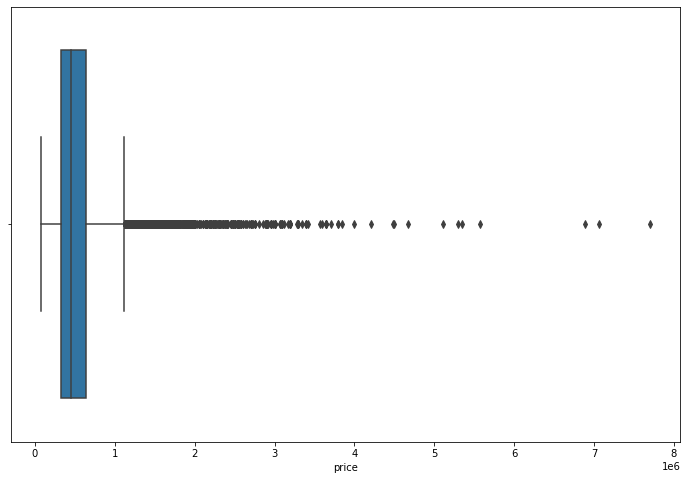

In [281]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='price', data=data, ax=ax)

In [282]:
#Get rid of outliers
outliers=data[(data['price'])>=7500000].index
data.drop(outliers, inplace=True)

Bedrooms

In [283]:
#looking at bedrooms
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      271
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

<AxesSubplot:xlabel='bedrooms'>

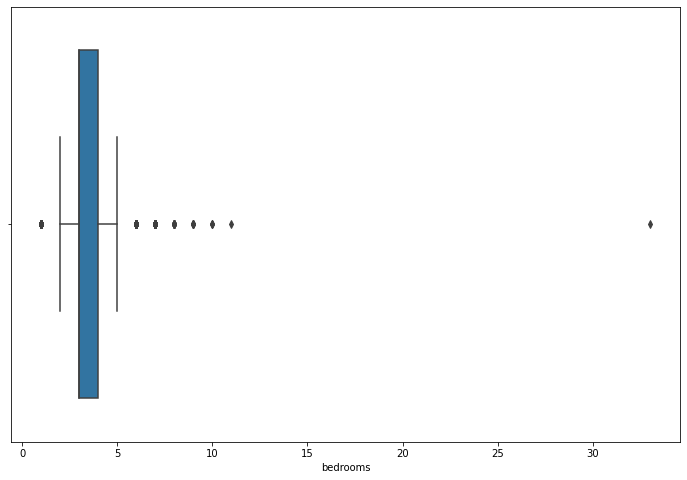

In [284]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='bedrooms', data=data, ax=ax)

In [285]:
#drop outliers
data = data.loc[data['bedrooms'] < 15]

Sqft_living

In [286]:
#looking at sqft_living column
data['sqft_living'].describe()

count    21595.000000
mean      2079.881500
std        915.633139
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

<AxesSubplot:xlabel='sqft_living'>

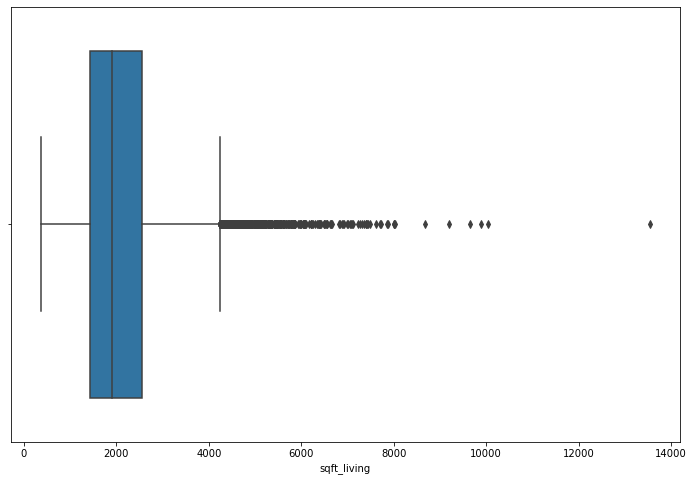

In [287]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='sqft_living', data=data, ax=ax)

In [288]:
#Get rid of outliers
data = data.loc[data['sqft_living'] < 8000]

Sqft_lot

In [289]:
#looking at sqft_lot column
data['sqft_lot'].describe()

count    2.158600e+04
mean     1.507868e+04
std      4.137255e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.616000e+03
75%      1.066575e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

<AxesSubplot:xlabel='sqft_lot'>

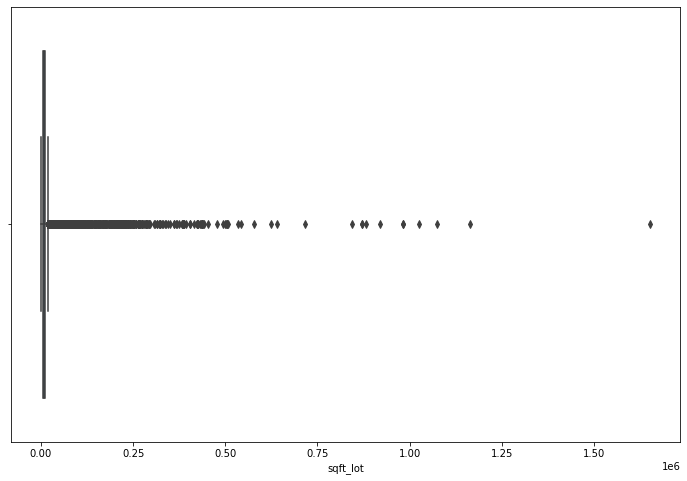

In [290]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='sqft_lot', data=data, ax=ax)

In [291]:
data['sqft_lot'].max()

1651359

In [292]:
data['sqft_lot'].sort_values()

15729        520
5821         572
7582         600
3449         609
20588        635
          ...   
3945      982998
7762     1024068
7640     1074218
17305    1164794
1717     1651359
Name: sqft_lot, Length: 21586, dtype: int64

In [293]:
#Get rid of outliers
data = data.loc[data['sqft_lot'] < 1000000]

Floors

In [294]:
#looking at floors column
data['floors'].value_counts()

1.0    10669
2.0     8227
1.5     1909
3.0      610
2.5      160
3.5        7
Name: floors, dtype: int64

<AxesSubplot:xlabel='floors'>

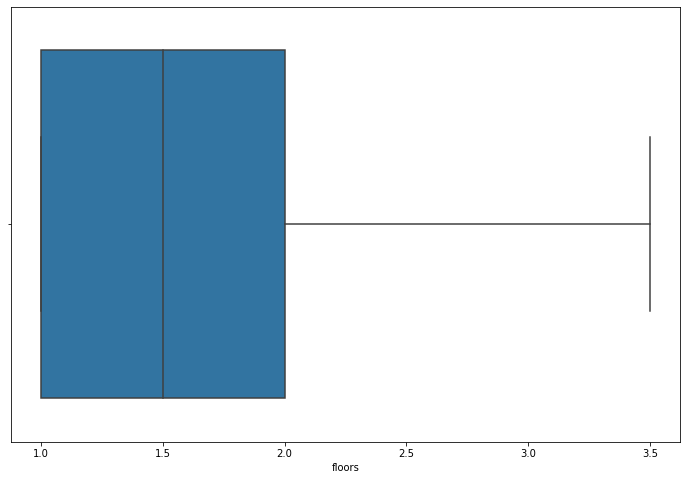

In [295]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='floors', data=data, ax=ax)

In [296]:
data = data.loc[data['floors'] < 2.5]

Condition

In [297]:
#looking at condition
data['condition'].value_counts()

3    13308
4     5625
5     1674
2      169
1       29
Name: condition, dtype: int64

<AxesSubplot:xlabel='condition'>

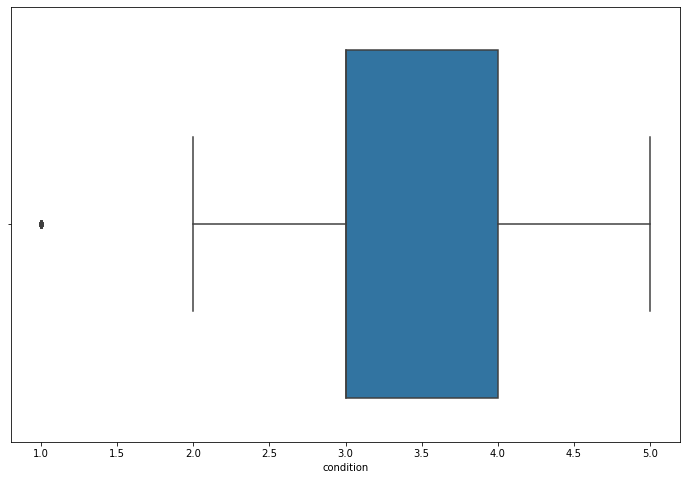

In [298]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='condition', data=data, ax=ax)

In [299]:
data = data.loc[data['condition'] > 2]

Grade

In [300]:
#looking at grade
data['grade'].value_counts()

7     8778
8     5606
9     2485
6     1965
10    1080
11     366
5      218
12      79
4       22
13       7
3        1
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade'>

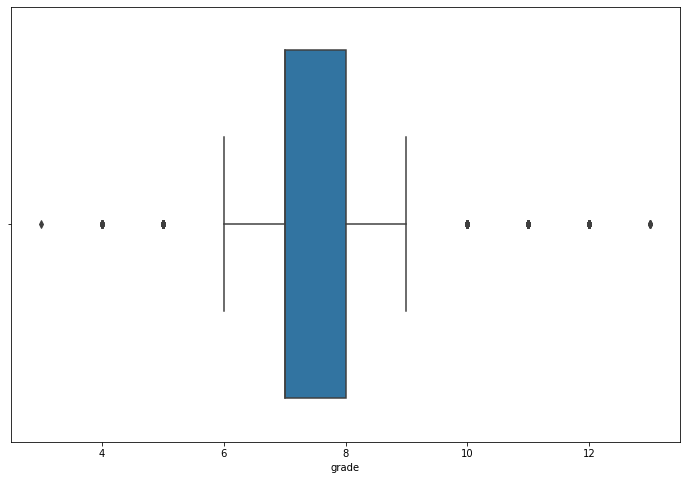

In [301]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='grade', data=data, ax=ax)

Sqft_living15

In [302]:
#looking at sqft_living 15
data['sqft_living15'].describe()

count    20607.000000
mean      1997.899985
std        684.495611
min        399.000000
25%       1500.000000
50%       1860.000000
75%       2380.000000
max       6210.000000
Name: sqft_living15, dtype: float64

<AxesSubplot:xlabel='sqft_living15'>

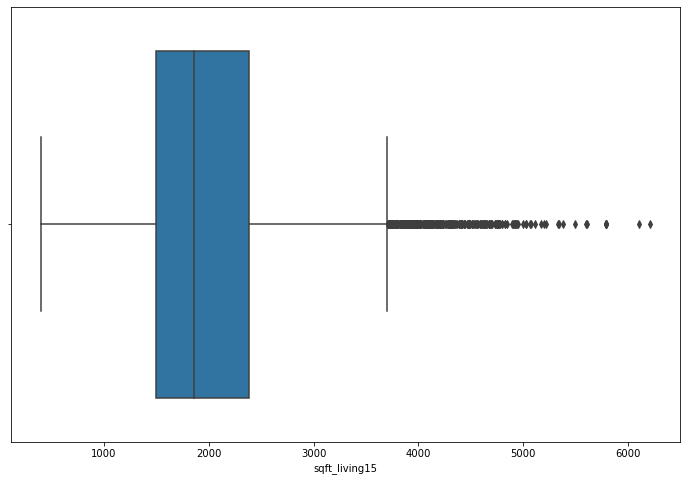

In [303]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='sqft_living15', data=data, ax=ax)

In [304]:
data = data.loc[data['sqft_living15'] < 5000]

Sqft_lot15

In [305]:
#looking at sqft_lot 15
data['sqft_lot15'].describe()

count     20584.000000
mean      12888.522736
std       26948.131256
min         651.000000
25%        5250.000000
50%        7700.000000
75%       10140.250000
max      871200.000000
Name: sqft_lot15, dtype: float64

<AxesSubplot:xlabel='sqft_lot15'>

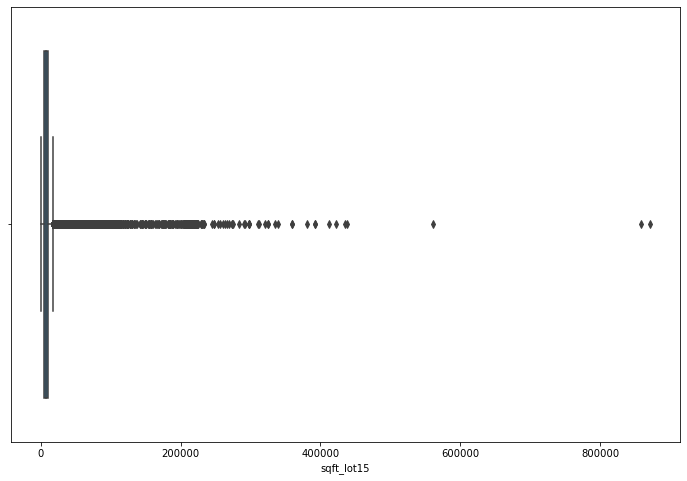

In [306]:
 fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='sqft_lot15', data=data, ax=ax)

In [307]:
data = data.loc[data['sqft_lot15'] < 500000]

In [308]:
#Feature Engineering

#create renovated, view, and waterfront to be yes/no
#create new feature for bathrooms per bedroom and price per square foot
data['renovated'] = data['yr_renovated'].astype('bool').astype('int')
data['waterfront'] = data['waterfront'].astype('bool').astype('int')
data['view'] = data['view'].astype('bool').astype('int')
data['bath_per_bed'] = data['bathrooms'] / data['bedrooms']
data['price_per_sqft'] = data['price'] / data['sqft_living']

In [309]:
data['price_per_sqft'].head()

0    188.050847
1    209.338521
2    233.766234
3    308.163265
4    303.571429
Name: price_per_sqft, dtype: float64

In [310]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month_sold', 'has_basement',
       'renovated', 'bath_per_bed', 'price_per_sqft'],
      dtype='object')

In [311]:
#dropping yr_renovated and sqft_basement
data = data.drop(['yr_renovated', 'sqft_basement'], axis=1)

In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20581 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           20581 non-null  float64
 1   bedrooms        20581 non-null  int64  
 2   bathrooms       20581 non-null  float64
 3   sqft_living     20581 non-null  int64  
 4   sqft_lot        20581 non-null  int64  
 5   floors          20581 non-null  float64
 6   waterfront      20581 non-null  int32  
 7   view            20581 non-null  int32  
 8   condition       20581 non-null  int64  
 9   grade           20581 non-null  int64  
 10  sqft_above      20581 non-null  int64  
 11  yr_built        20581 non-null  int64  
 12  zipcode         20581 non-null  object 
 13  lat             20581 non-null  float64
 14  long            20581 non-null  float64
 15  sqft_living15   20581 non-null  int64  
 16  sqft_lot15      20581 non-null  int64  
 17  month_sold      20581 non-null 

## Checking Linearity

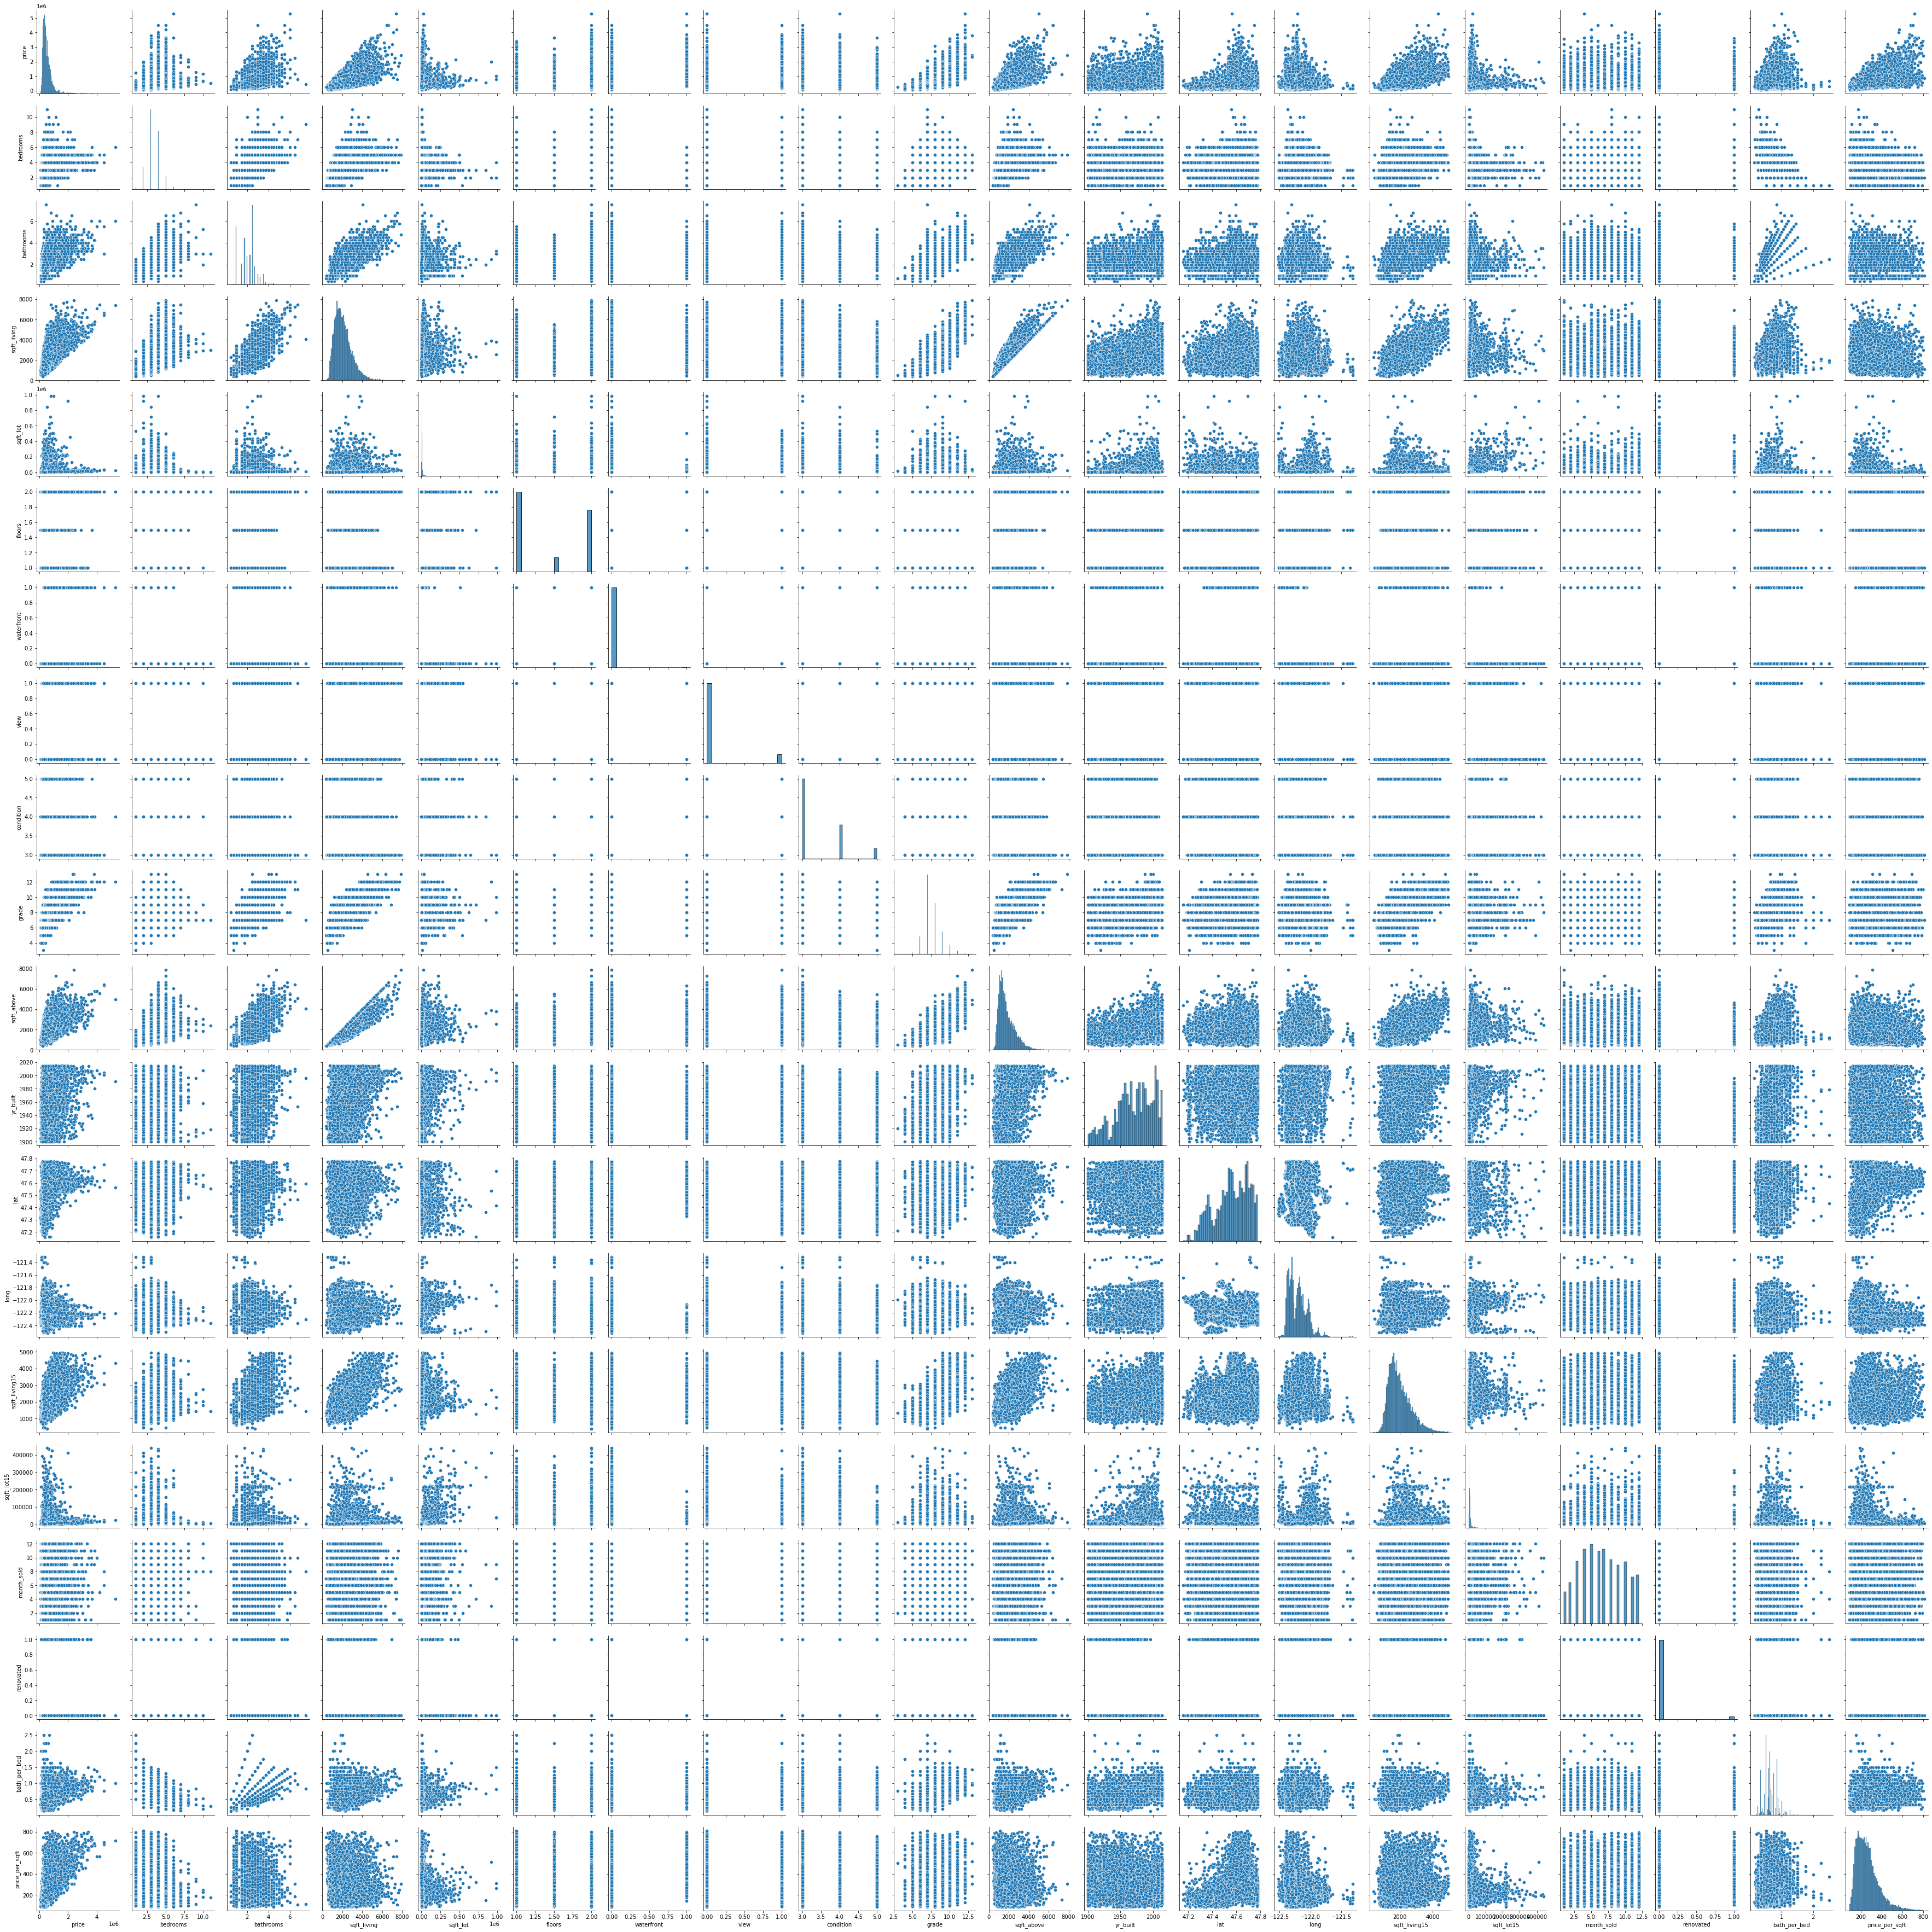

In [313]:
sns.pairplot(data)
plt.show()

In [314]:
#make our target!
TARGET = 'price'
X_VALS = [c for c in data.columns if c != TARGET]
TARGET in X_VALS

False

In [315]:
X_VALS

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'month_sold',
 'has_basement',
 'renovated',
 'bath_per_bed',
 'price_per_sqft']

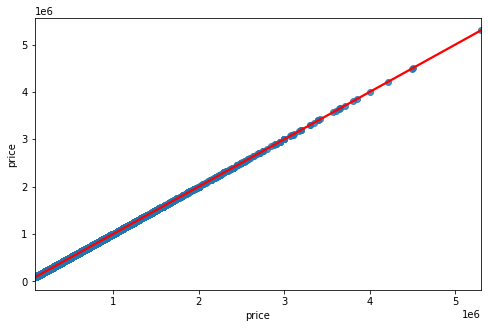

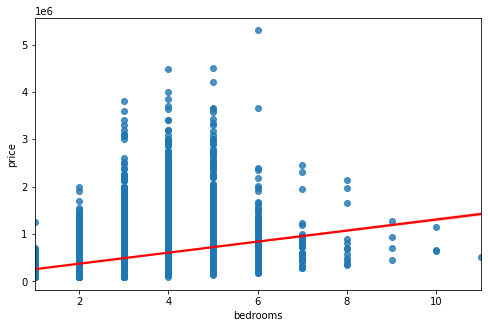

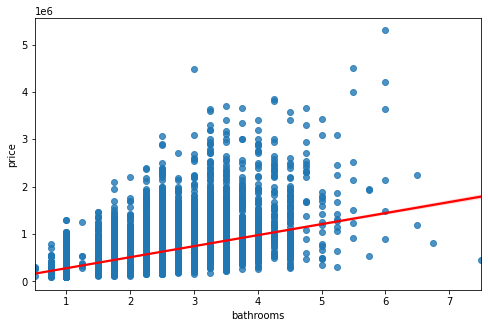

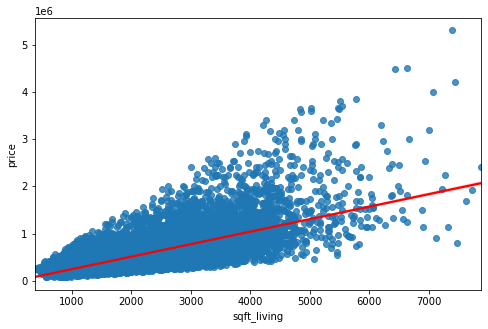

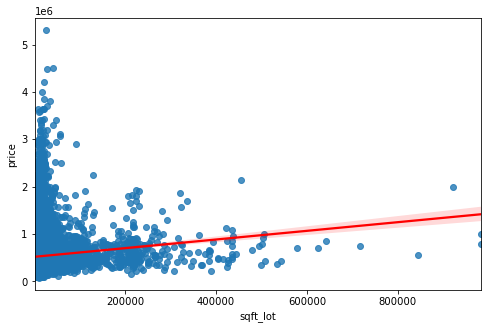

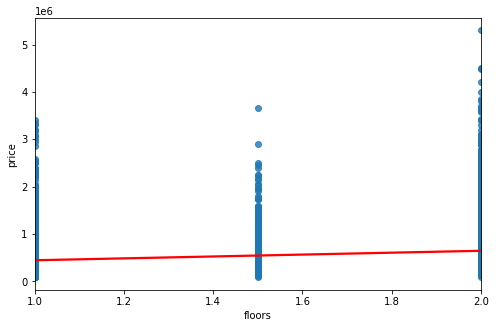

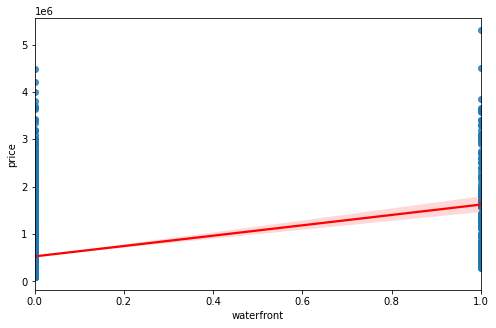

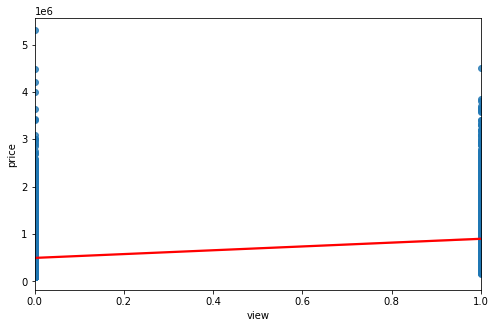

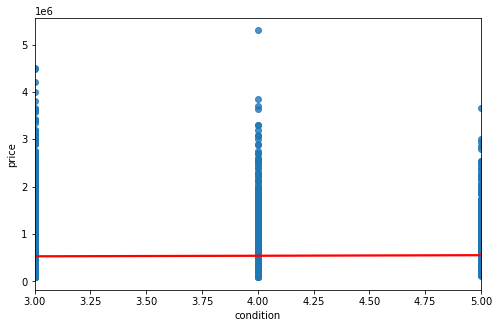

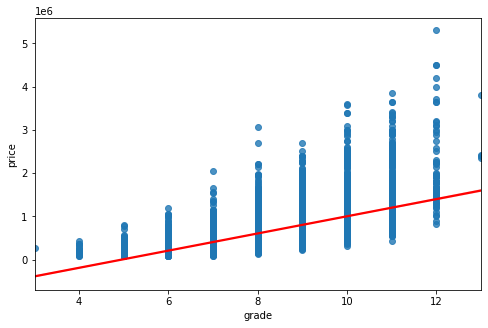

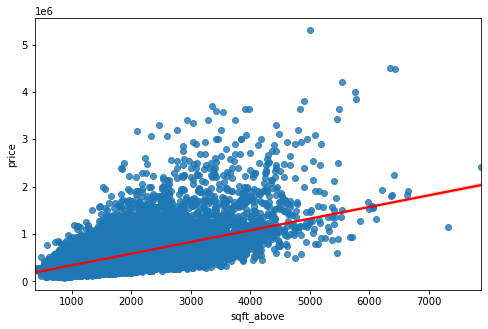

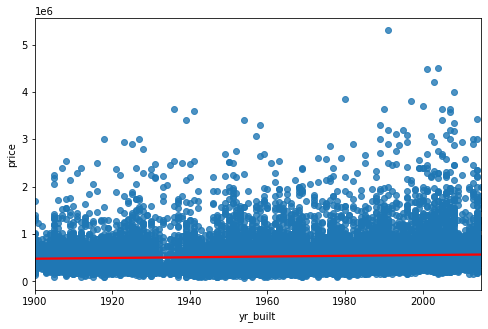

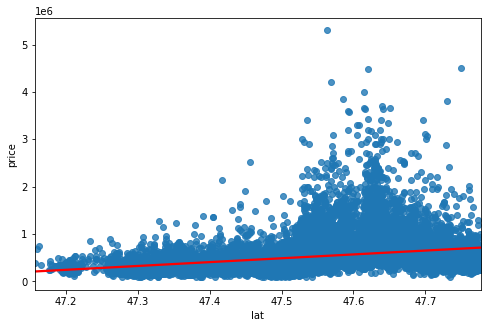

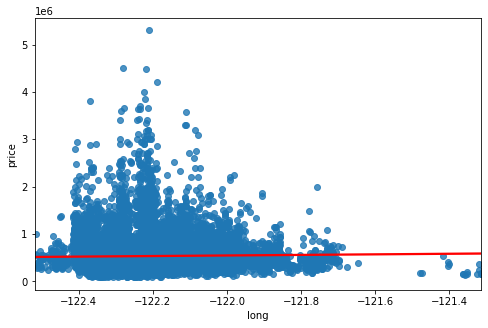

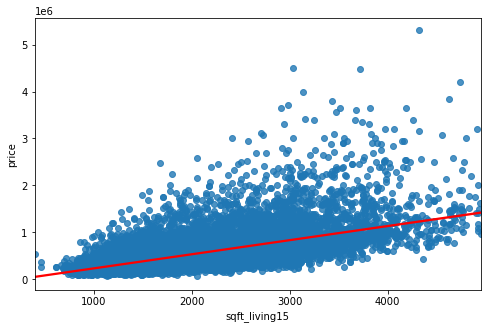

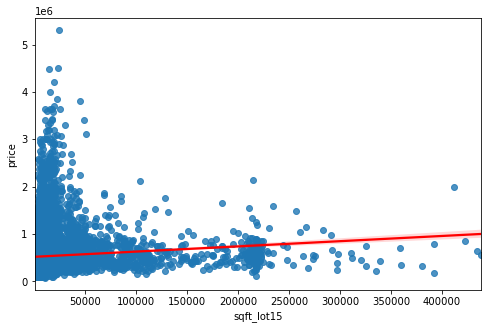

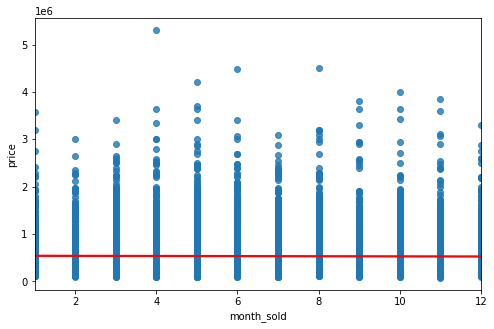

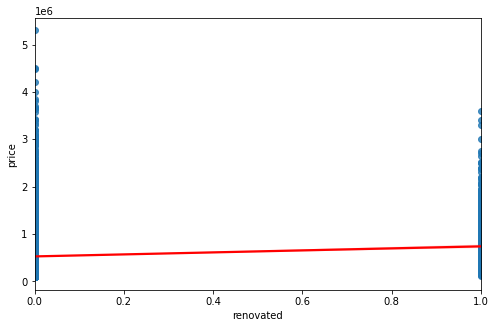

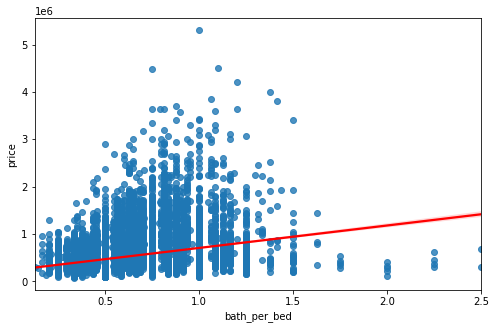

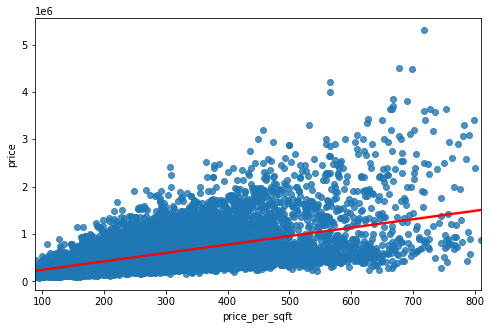

In [316]:
#iterate over the continuous data to compare it with the price to see which features 
#we want to explore further by using sns.regplot()
for col in data.describe().columns:
    plt.figure(figsize=(8,5))
    sns.regplot(data=data, x=col, y= TARGET, line_kws={'color': 'red'})

In [317]:
pd.DataFrame(data.corr()['price']).sort_values(by='price',ascending=False)

price
price           1.000000
sqft_living     0.682820
grade           0.669107
sqft_living15   0.591377
sqft_above      0.579985
price_per_sqft  0.567296
bathrooms       0.513478
view            0.347539
lat             0.330478
bedrooms        0.305270
bath_per_bed    0.286156
floors          0.276330
waterfront      0.255650
renovated       0.113310
sqft_lot        0.097213
sqft_lot15      0.081282
yr_built        0.064430
long            0.024396
condition       0.021642
month_sold     -0.011530

### Multicollinearity

In [318]:
#Identifying multicollinearity
features = data.drop(['price'], axis=1)
target=data['price']
features.head(10)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   
5         4       4.50         5420    101930     1.0           0     0   
6         3       2.25         1715      6819     2.0           0     0   
7         3       1.50         1060      9711     1.0           0     0   
8         3       1.00         1780      7470     1.0           0     0   
9         3       2.50         1890      6560     2.0           0     0   

   condition  grade  sqft_above  ...  zipcode      lat     long  \
0          3      7        1180  ...    98178  47.5112 -122.257   
1          3      7        2170  ...    98125  47.7210 -122.319   
2          3      6         770  ...    98028  47.7379 -122.233   
3          5      7        1050  ...    98136  47.5208 -122.393   
4          3      8        1680  ...    98074  47.6168 -122.045   
5          3     11        3890  ...    98053  47.6561 -122.005   
6          3      7        1715  ...    98003  47.3097 -122.327   
7          3      7        1060  ...    98198  47.4095 -122.315   
8          3      7        1050  ...    98146  47.5123 -122.337   
9          3      7        1890  ...    98038  47.3684 -122.031   

   sqft_living15  sqft_lot15  month_sold  has_basement renovated  \
0           1340        5650          10         False         0   
1           1690        7639          12          True         1   
2           2720        8062           2         False         0   
3           1360        5000          12          True         0   
4           1800        7503           2         False         0   
5           4760      101930           5          True         0   
6           2238        6819           6         False         0   
7           1650        9711           1         False         0   
8           1780        8113           4          True         0   
9           2390        7570           3         False         0   

   bath_per_bed  price_per_sqft  
0      0.333333      188.050847  
1      0.750000      209.338521  
2      0.500000      233.766234  
3      0.750000      308.163265  
4      0.666667      303.571429  
5      1.125000      226.937269  
6      0.750000      150.145773  
7      0.500000      275.330189  
8      0.333333      128.932584  
9      0.833333      170.899471  

[10 rows x 21 columns]

In [319]:
#Select only significant correlations greater than 0.75
abs(features.corr()) > 0.75

bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
bedrooms            True      False        False     False   False   
bathrooms          False       True         True     False   False   
sqft_living        False       True         True     False   False   
sqft_lot           False      False        False      True   False   
floors             False      False        False     False    True   
waterfront         False      False        False     False   False   
view               False      False        False     False   False   
condition          False      False        False     False   False   
grade              False      False         True     False   False   
sqft_above         False      False         True     False   False   
yr_built           False      False        False     False   False   
lat                False      False        False     False   False   
long               False      False        False     False   False   
sqft_living15      False      False         True     False   False   
sqft_lot15         False      False        False     False   False   
month_sold         False      False        False     False   False   
renovated          False      False        False     False   False   
bath_per_bed       False      False        False     False   False   
price_per_sqft     False      False        False     False   False   

                waterfront   view  condition  grade  sqft_above  yr_built  \
bedrooms             False  False      False  False       False     False   
bathrooms            False  False      False  False       False     False   
sqft_living          False  False      False   True        True     False   
sqft_lot             False  False      False  False       False     False   
floors               False  False      False  False       False     False   
waterfront            True  False      False  False       False     False   
view                 False   True      False  False       False     False   
condition            False  False       True  False       False     False   
grade                False  False      False   True        True     False   
sqft_above           False  False      False   True        True     False   
yr_built             False  False      False  False       False      True   
lat                  False  False      False  False       False     False   
long                 False  False      False  False       False     False   
sqft_living15        False  False      False  False       False     False   
sqft_lot15           False  False      False  False       False     False   
month_sold           False  False      False  False       False     False   
renovated            False  False      False  False       False     False   
bath_per_bed         False  False      False  False       False     False   
price_per_sqft       False  False      False  False       False     False   

                  lat   long  sqft_living15  sqft_lot15  month_sold  \
bedrooms        False  False          False       False       False   
bathrooms       False  False          False       False       False   
sqft_living     False  False           True       False       False   
sqft_lot        False  False          False       False       False   
floors          False  False          False       False       False   
waterfront      False  False          False       False       False   
view            False  False          False       False       False   
condition       False  False          False       False       False   
grade           False  False          False       False       False   
sqft_above      False  False          False       False       False   
yr_built        False  False          False       False       False   
lat              True  False          False       False       False   
long            False   True          False       False       False   
sqft_living15   False  False           True       False       False   
sqft_lot1

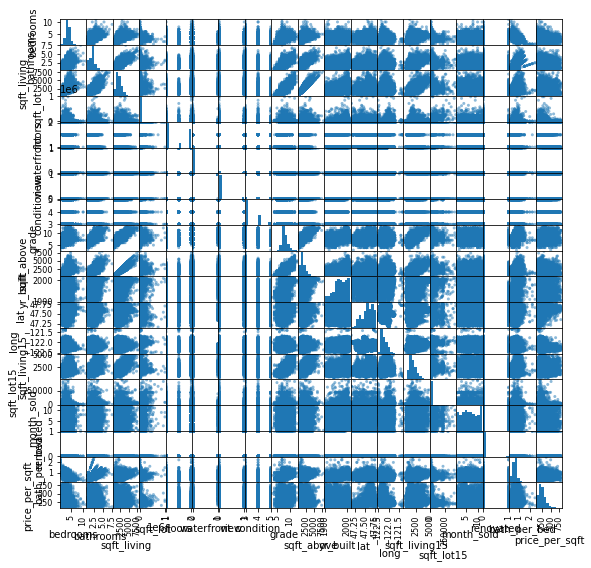

In [320]:
pd.plotting.scatter_matrix(features,figsize  = [9, 9]);
plt.show()

In [321]:
features.corr()

bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
bedrooms        1.000000   0.532675     0.589761  0.029826  0.246161   
bathrooms       0.532675   1.000000     0.762974  0.096192  0.532967   
sqft_living     0.589761   0.762974     1.000000  0.181702  0.436330   
sqft_lot        0.029826   0.096192     0.181702  1.000000  0.020515   
floors          0.246161   0.532967     0.436330  0.020515  1.000000   
waterfront     -0.006664   0.057809     0.090341  0.026513  0.019239   
view            0.071618   0.162686     0.251082  0.063783  0.009121   
condition      -0.003750  -0.149393    -0.093846 -0.007128 -0.279252   
grade           0.362056   0.658988     0.767562  0.129389  0.482159   
sqft_above      0.483466   0.683946     0.867945  0.195071  0.614839   
yr_built        0.191494   0.521343     0.362014  0.075862  0.478848   
lat            -0.004576   0.011276     0.060756 -0.084040 -0.015678   
long            0.129212   0.245378     0.241529  0.232720  0.230955   
sqft_living15   0.395243   0.580559     0.757038  0.154372  0.376182   
sqft_lot15      0.026994   0.086456     0.175196  0.748766  0.015574   
month_sold     -0.000297   0.007300     0.011498  0.007817  0.013971   
renovated       0.011084   0.042295     0.039470  0.007105  0.011992   
bath_per_bed   -0.230506   0.655101     0.330709  0.078173  0.395540   
price_per_sqft -0.220444  -0.118007    -0.112095 -0.036609 -0.063077   

                waterfront      view  condition     grade  sqft_above  \
bedrooms         -0.006664  0.071618  -0.003750  0.362056    0.483466   
bathrooms         0.057809  0.162686  -0.149393  0.658988    0.683946   
sqft_living       0.090341  0.251082  -0.093846  0.767562    0.867945   
sqft_lot          0.026513  0.063783  -0.007128  0.129389    0.195071   
floors            0.019239  0.009121  -0.279252  0.482159    0.614839   
waterfront        1.000000  0.244657   0.022794  0.076062    0.058973   
view              0.244657  1.000000   0.045272  0.223943    0.129405   
condition         0.022794  0.045272   1.000000 -0.177408   -0.193626   
grade             0.076062  0.223943  -0.177408  1.000000    0.754693   
sqft_above        0.058973  0.129405  -0.193626  0.754693    1.000000   
yr_built         -0.027452 -0.067127  -0.379508  0.458781    0.464045   
lat              -0.014211  0.011127  -0.007783  0.107406   -0.001459   
long             -0.044718 -0.096083  -0.130452  0.216236    0.355387   
sqft_living15     0.078969  0.262787  -0.124562  0.725467    0.730346   
sqft_lot15        0.034416  0.054641  -0.001270  0.123312    0.188932   
month_sold        0.009992 -0.005525   0.020180  0.009189    0.010273   
renovated         0.074107  0.081728  -0.062125  0.010913    0.010627   
bath_per_bed      0.073837  0.115775  -0.159969  0.408511    0.321029   
price_per_sqft    0.183267  0.195708   0.114729  0.105040   -0.109088   

                yr_built       lat      long  sqft_living15  sqft_lot15  \
bedrooms        0.191494 -0.004576  0.129212       0.395243    0.026994   
bathrooms       0.521343  0.011276  0.245378       0.580559    0.086456   
sqft_living     0.362014  0.060756  0.241529       0.757038    0.175196   
sqft_lot        0.075862 -0.084040  0.232720       0.154372    0.748766   
floors          0.478848 -0.015678  0.230955       0.376182    0.015574   
waterfront     -0.027452 -0.014211 -0.044718       0.078969    0.034416   
view           -0.067127  0.011127 -0.096083       0.262787    0.054641   
condition      -0.379508 -0.007783 -0.130452      -0.124562   -0.001270   
grade           0.458781  0.107406  0.216236       0.725467    0.123312   
sqft_above      0.464045 -0.001459  0.355387       0.730346    0.188932   
yr_built        1.000000 -0.178799  0.453693       0.367074    0.085972   
lat            -0.178799  1.000000 -0.119937       0.062274   -0.080076   
long            0.453693 -0.119937  1.000000       0.328453    0.253054   
sqft_living15   0.367074  0.062274  0.328453       1.000000    0

In [322]:
#inlude stack and zip to create a more robust solution that will return
#the variable pairs from the correlation matrix that have correlations over .75, but less than 1.
df = features.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

#drop duplicates
df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc<1)]

cc
pairs                                 
(sqft_above, sqft_living)     0.867945
(sqft_living, grade)          0.767562
(sqft_living, bathrooms)      0.762974
(sqft_living15, sqft_living)  0.757038
(sqft_above, grade)           0.754693

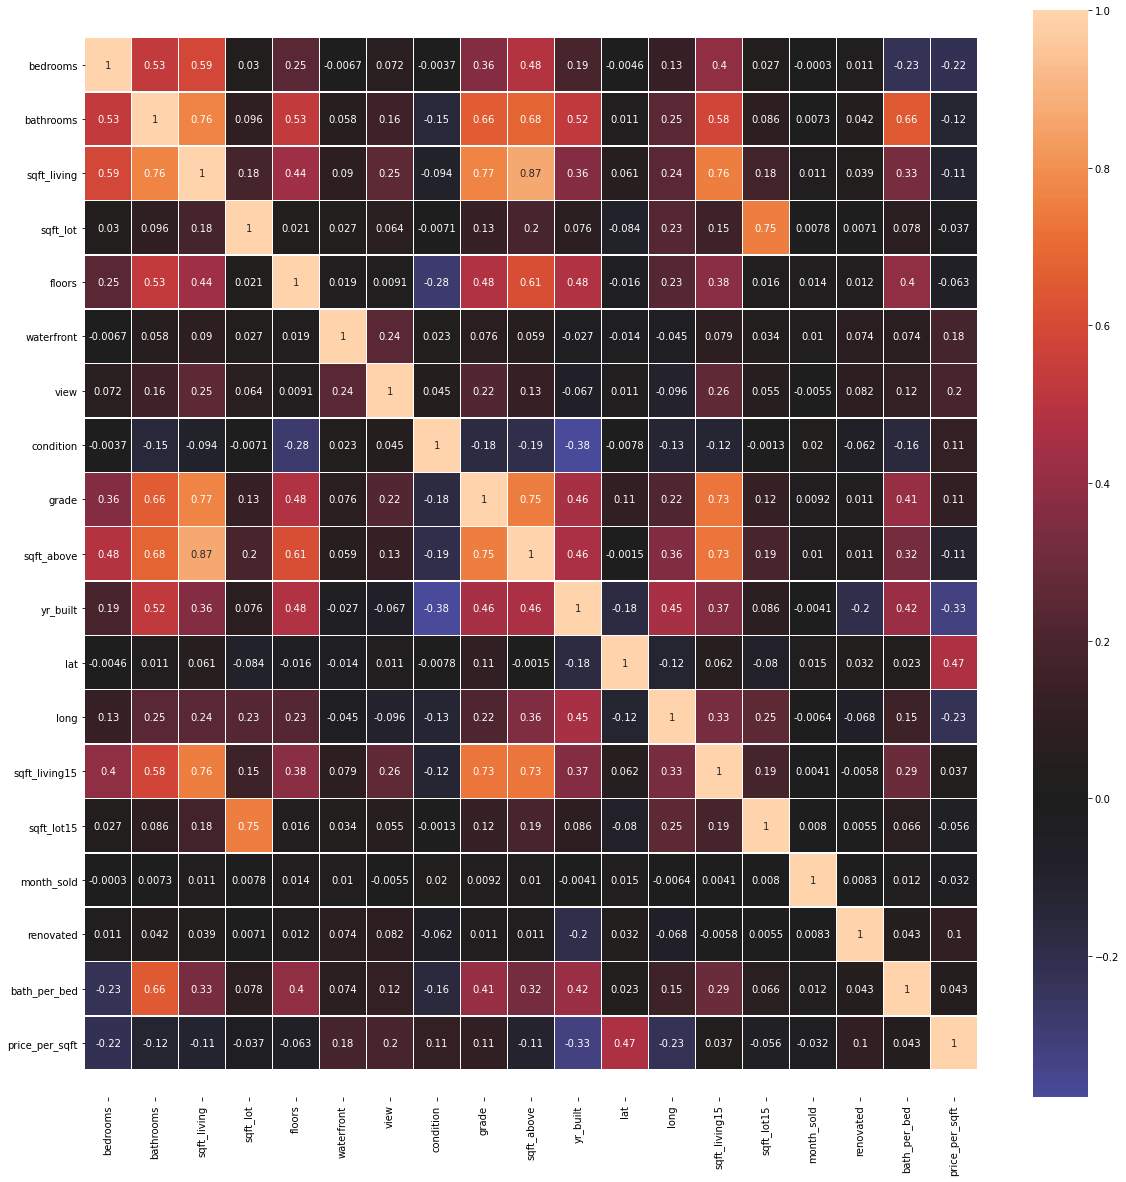

In [323]:
#Heat map
plt.figure(figsize=(20, 20))
ax = sns.heatmap(features.corr(), center=0, linewidths=.5, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Log Transformation

In [324]:
#separate into continuous and categorical columns
continuous = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15',
             'price', 'price_per_sqft', 'bath_per_bed']

categoricals = ['waterfront', 'floors', 'condition', 'grade','renovated', 'view',
            'zipcode', 'bedrooms', 'bathrooms', 'has_basement', 'month_sold']

In [325]:
#Transformation non-normal features
#take out sqft_basement,yr_renovated, these two features after log and normalization are creating either Nan
#or infinity values I tried diffrent normalization methods and still same result.

    
kc_cont = data[continuous]

#log features
log_names = [f'{column}_log' for column in kc_cont.columns]

kc_log = np.log(kc_cont)
kc_log.columns = log_names



# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

kc_log_norm =kc_log.apply(normalize)

### OHE

In [326]:
#Categorial features
#data['waterfront'] = data['waterfront'].astype('category')
#data['floors'] = data['floors'].astype('category')
#data['condition'] = data['condition'].astype('category')
#data['grade'] = data['grade'].astype('category')
#data['renovated'] = data['renovated'].astype('category')
#data['view'] = data['view'].astype('category')
#data['zipcode']=data['zipcode'].astype('category')
#data['bedrooms']=data['bedrooms'].astype('category')
#data['bathrooms']=data['bathrooms'].astype('category')
#data['has_basement']=data['has_basement'].astype('category')
#data['month_sold']=data['month_sold'].astype('category')

#df_dummy = pd.get_dummies(data[categoricals], prefix=categoricals, drop_first=True)

In [327]:
#Combine categorial and continuous features
#preprocessed = pd.concat([kc_log_norm, data[categoricals]], axis=1)
#preprocessed.head()

## Checking Multiple Linear Regression

In [328]:
#X = preprocessed.drop('price_log', axis=1)
#y = preprocessed['price_log']
#X_int = sm.add_constant(X)
#model = sm.OLS(y,X_int).fit()
#model.summary()

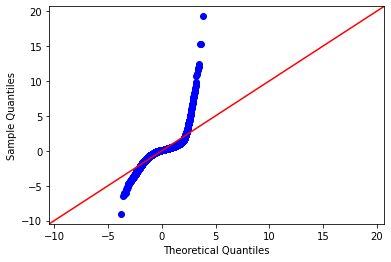

In [329]:
sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True);

Use original cleaned data to build a new model

In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20581 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           20581 non-null  float64
 1   bedrooms        20581 non-null  int64  
 2   bathrooms       20581 non-null  float64
 3   sqft_living     20581 non-null  int64  
 4   sqft_lot        20581 non-null  int64  
 5   floors          20581 non-null  float64
 6   waterfront      20581 non-null  int32  
 7   view            20581 non-null  int32  
 8   condition       20581 non-null  int64  
 9   grade           20581 non-null  int64  
 10  sqft_above      20581 non-null  int64  
 11  yr_built        20581 non-null  int64  
 12  zipcode         20581 non-null  object 
 13  lat             20581 non-null  float64
 14  long            20581 non-null  float64
 15  sqft_living15   20581 non-null  int64  
 16  sqft_lot15      20581 non-null  int64  
 17  month_sold      20581 non-null 

## Train-Test Split

Do the train test split to model only the training data. 

In [331]:
y = data[TARGET]
X = data.drop(columns=[TARGET])
X

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21591         3       2.50         1310      1294     2.0           0     0   
21593         4       2.50         2310      5813     2.0           0     0   
21594         2       0.75         1020      1350     2.0           0     0   
21595         3       2.50         1600      2388     2.0           0     0   
21596         2       0.75         1020      1076     2.0           0     0   

       condition  grade  sqft_above  ...  zipcode      lat     long  \
0              3      7        1180  ...    98178  47.5112 -122.257   
1              3      7        2170  ...    98125  47.7210 -122.319   
2              3      6         770  ...    98028  47.7379 -122.233   
3              5      7        1050  ...    98136  47.5208 -122.393   
4              3      8        1680  ...    98074  47.6168 -122.045   
...          ...    ...         ...  ...      ...      ...      ...   
21591          3      8        1180  ...    98116  47.5773 -122.409   
21593          3      8        2310  ...    98146  47.5107 -122.362   
21594          3      7        1020  ...    98144  47.5944 -122.299   
21595          3      8        1600  ...    98027  47.5345 -122.069   
21596          3      7        1020  ...    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  month_sold  has_basement renovated  \
0               1340        5650          10         False         0   
1               1690        7639          12          True         1   
2               2720        8062           2         False         0   
3               1360        5000          12          True         0   
4               1800        7503           2         False         0   
...              ...         ...         ...           ...       ...   
21591           1330        1265           2          True         0   
21593           1830        7200           2         False         0   
21594           1020        2007           6         False         0   
21595           1410        1287           1         False         0   
21596           1020        1357          10         False         0   

       bath_per_bed  price_per_sqft  
0          0.333333      188.050847  
1          0.750000      209.338521  
2          0.500000      233.766234  
3          0.750000      308.163265  
4          0.666667      303.571429  
...             ...             ...  
21591      0.833333      362.595420  
21593      0.625000      173.160173  
21594      0.375000      394.216667  
21595      0.833333      250.000000  
21596      0.375000      318.627451  

[20581 rows x 21 columns]

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15435, 21), (5146, 21), (15435,), (5146,))

In [333]:
NUM_COLS = X_train.select_dtypes('number').columns
CAT_COLS = X_train.select_dtypes('object').columns
CAT_COLS

Index(['zipcode', 'has_basement'], dtype='object')

In [334]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [335]:
# OHE
ohe = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = ohe.fit_transform(X_train[CAT_COLS])
X_test_ohe = ohe.transform(X_test[CAT_COLS])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(CAT_COLS))
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(CAT_COLS))

X_train_ohe.columns = [c.lower() for c in X_train_ohe]
X_test_ohe.columns = [c.lower() for c in X_test_ohe]

In [336]:
X_train_ohe.head()

zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   zipcode_98007  zipcode_98008  zipcode_98010  zipcode_98011  zipcode_98014  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            1.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   ...  zipcode_98148  zipcode_98155  zipcode_98166  zipcode_98168  \
0  ...            0.0            0.0            0.0            0.0   
1  ...            0.0            0.0            0.0            0.0   
2  ...            0.0            0.0            0.0            0.0   
3  ...            0.0            0.0            0.0            0.0   
4  ...            0.0            0.0            0.0            0.0   

   zipcode_98177  zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   has_basement_true  
0                1.0  
1                0.0  
2                0.0  
3                1.0  
4                1.0  

[5 rows x 70 columns]

In [337]:
X_train_raw = pd.concat([X_train[NUM_COLS], 
                         X_train_ohe], 
                        axis=1)
X_test_raw = pd.concat([X_test[NUM_COLS], 
                        X_test_ohe], 
                       axis=1)

In [338]:
# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[NUM_COLS])
X_test_scaled = scaler.transform(X_test[NUM_COLS])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train[NUM_COLS].columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test[NUM_COLS].columns)

In [339]:
X_train_scaled.shape, X_test_scaled.shape

((15435, 19), (5146, 19))

In [340]:

X_train_scaled = pd.concat([X_train_scaled, 
                            X_train_ohe], 
                           axis=1)
X_test_scaled = pd.concat([X_test_scaled, 
                           X_test_ohe], 
                          axis=1)

In [341]:
X_train_raw

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       2.00         3040     41072     1.0           0     0   
1             3       1.75         1550      8134     1.0           0     0   
2             4       2.75         3040     13559     2.0           0     0   
3             4       3.50         4460     16953     1.0           0     0   
4             3       2.50         3110      6000     1.0           0     1   
...         ...        ...          ...       ...     ...         ...   ...   
15430         3       1.50         2260      5300     1.0           0     0   
15431         4       2.50         1914      3272     2.0           0     0   
15432         3       1.75         2040      6000     1.0           0     0   
15433         2       1.00          590      8717     1.0           0     0   
15434         3       2.50         3410     41022     2.0           0     0   

       condition  grade  sqft_above  ...  zipcode_98148  zipcode_98155  \
0              4      8        1520  ...            0.0            0.0   
1              4      7        1550  ...            0.0            0.0   
2              3     11        3040  ...            0.0            0.0   
3              3      9        2550  ...            0.0            0.0   
4              3      8        1560  ...            0.0            0.0   
...          ...    ...         ...  ...            ...            ...   
15430          3      7        1200  ...            0.0            0.0   
15431          3      8        1914  ...            0.0            0.0   
15432          5      7        1120  ...            0.0            0.0   
15433          3      6         590  ...            0.0            0.0   
15434          3     11        3410  ...            0.0            0.0   

       zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  \
0                0.0            0.0            0.0            0.0   
1                0.0            0.0            0.0            0.0   
2                0.0            0.0            0.0            0.0   
3                0.0            0.0            0.0            0.0   
4                0.0            0.0            0.0            0.0   
...              ...            ...            ...            ...   
15430            0.0            0.0            0.0            0.0   
15431            0.0            0.0            0.0            0.0   
15432            0.0            0.0            0.0            0.0   
15433            0.0            0.0            0.0            0.0   
15434            0.0            0.0            0.0            0.0   

       zipcode_98188  zipcode_98198  zipcode_98199  has_basement_true  
0                0.0            0.0            0.0                1.0  
1                0.0            0.0            0.0                0.0  
2                0.0            0.0            0.0                0.0  
3                0.0            0.0            0.0                1.0  
4                0.0            0.0            0.0                1.0  
...              ...            ...            ...                ...  
15430            0.0            0.0            0.0                1.0  
15431            0.0            0.0            0.0                0.0  
15432            0.0            0.0            0.0                1.0  
15433            0.0            0.0            0.0                0.0  
15434            0.0            0.0            0.0                0.0  

[15435 rows x 89 columns]

In [342]:
X_train_scaled

bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0     -0.424306  -0.137586     1.090109  0.746540 -0.934757   -0.082363   
1     -0.424306  -0.467805    -0.596445 -0.187985 -0.934757   -0.082363   
2      0.689686   0.853071     1.090109 -0.034065  1.180162   -0.082363   
3      0.689686   1.843729     2.697429  0.062230 -0.934757   -0.082363   
4     -0.424306   0.522852     1.169343 -0.248531 -0.934757   -0.082363   
...         ...        ...          ...       ...       ...         ...   
15430 -0.424306  -0.798024     0.207215 -0.268391 -0.934757   -0.082363   
15431  0.689686   0.522852    -0.184428 -0.325930  1.180162   -0.082363   
15432 -0.424306  -0.467805    -0.041807 -0.248531 -0.934757   -0.082363   
15433 -1.538298  -1.458462    -1.683084 -0.171444 -0.934757   -0.082363   
15434 -0.424306   0.522852     1.508917  0.745121  1.180162   -0.082363   

           view  condition     grade  sqft_above  ...  zipcode_98148  \
0     -0.327847   0.879066  0.316360   -0.320112  ...            0.0   
1     -0.327847   0.879066 -0.552196   -0.282680  ...            0.0   
2     -0.327847  -0.687541  2.922028    1.576439  ...            0.0   
3     -0.327847  -0.687541  1.184916    0.965051  ...            0.0   
4      3.050203  -0.687541  0.316360   -0.270203  ...            0.0   
...         ...        ...       ...         ...  ...            ...   
15430 -0.327847  -0.687541 -0.552196   -0.719386  ...            0.0   
15431 -0.327847  -0.687541  0.316360    0.171494  ...            0.0   
15432 -0.327847   2.445672 -0.552196   -0.819204  ...            0.0   
15433 -0.327847  -0.687541 -1.420751   -1.480501  ...            0.0   
15434 -0.327847  -0.687541  2.922028    2.038099  ...            0.0   

       zipcode_98155  zipcode_98166  zipcode_98168  zipcode_98177  \
0                0.0            0.0            0.0            0.0   
1                0.0            0.0            0.0            0.0   
2                0.0            0.0            0.0            0.0   
3                0.0            0.0            0.0            0.0   
4                0.0            0.0            0.0            0.0   
...              ...            ...            ...            ...   
15430            0.0            0.0            0.0            0.0   
15431            0.0            0.0            0.0            0.0   
15432            0.0            0.0            0.0            0.0   
15433            0.0            0.0            0.0            0.0   
15434            0.0            0.0            0.0            0.0   

       zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  \
0                0.0            0.0            0.0            0.0   
1                0.0            0.0            0.0            0.0   
2                0.0            0.0            0.0            0.0   
3                0.0            0.0            0.0            0.0   
4                0.0            0.0            0.0            0.0   
...              ...            ...            ...            ...   
15430            0.0            0.0            0.0            0.0   
15431            0.0            0.0            0.0            0.0   
15432            0.0            0.0            0.0            0.0   
15433            0.0            0.0            0.0            0.0   
15434            0.0            0.0            0.0            0.0   

       has_basement_true  
0                    1.0  
1                    0.0  
2                    0.0  
3                    1.0  
4                    1.0  
...                  ...  
15430                1.0  
15431                0.0  
15432                1.0  
15433                0.0  
15434                0.0  

[15435 rows x 89 columns]

In [343]:
def create_vif_dct(dataframe, const_col_name='const'):
    """
    
    Definition:
    Returns a list with each object in the list being the name of a column and it's variance inflation factor
    
    Args:
    df = selected dataframe in number format
    
    dummy checking
    
    
    """
    
    if const_col_name not in dataframe.columns:
        dataframe = sm.add_constant(dataframe)
        
    # Dummy-checking.
    df = dataframe.select_dtypes('number')
    if df.shape != dataframe.shape:
        warnings.warn('\n\nThere are non-numerical columns trying to be passed!\nThese have automatically been removed.\n')
    if df.isna().sum().any():
        raise ValueError('There may not be any missing values in the dataframe!')
        
    # Creating VIF Dictionary.
    vif_dct = {}

    # Loop through each row and set the variable name to the VIF. 
    for i in range(len(df.columns)):
        vif = variance_inflation_factor(df.values, i)
        v = df.columns[i]
        vif_dct[v] = vif

    return vif_dct

In [344]:
model = sm.OLS(y_train, X_train_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              5528.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):                        0.00
Time:                        23:07:45   Log-Likelihood:                     -2.0112e+05
No. Observations:               15435   AIC:                                  4.024e+05
Df Residuals:                   15346   BIC:                                  4.031e+05
Df Model:                          89                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
bedrooms          -1.409e+04   2587.866     -5.444      0.000   -1.92e+04   -9014.917
bathrooms          2.712e+04   3550.462      7.639      0.000    2.02e+04    3.41e+04
sqft_living        2.104e+05   3607.863     58.331      0.000    2.03e+05    2.18e+05
sqft_lot          -2778.2649   1340.877     -2.072      0.038   -5406.542    -149.988
floors            -5984.4317   1399.750     -4.275      0.000   -8728.108   -3240.756
waterfront          2.81e+04    994.389     28.263      0.000    2.62e+04    3.01e+04
view               9194.9283   1053.589      8.727      0.000    7129.768    1.13e+04
condition          6286.5903   1038.745      6.052      0.000    4250.527    8322.654
grade               3.12e+04   1757.462     17.755      0.000    2.78e+04    3.46e+04
sqft_above          1.81e+04   3525.884      5.132      0.000    1.12e+04     2.5e+04
yr_built          -2375.3243   1552.812     -1.530      0.126   -5419.019     668.371
lat               -2.266e+05   3540.425    -63.994      0.000   -2.34e+05    -2.2e+05
long              -3.692e+04   4975.898     -7.421      0.000   -4.67e+04   -2.72e+04
sqft_living15     -1.207e+04   1632.823     -7.392      0.000   -1.53e+04   -8868.967
sqft_lot15         -281.5090   1366.896     -0.206      0.837   -2960.788    2397.769
month_sold         -938.9786    896.274     -1.048      0.295   -2695.781     817.824
renovated          3815.9350    951.893      4.009      0.000    1950.111    5681.759
bath_per_bed      -1.563e+04   2883.419     -5.422      0.000   -2.13e+04   -9982.360
price_per_sqft     1.949e+05   1674.407    116.389      0.000    1.92e+05    1.98e+05
zipcode_98002      1.604e+05   1.09e+04     14.709      0.000    1.39e+05    1.82e+05
zipcode_98003      1.008e+05   9563.759     10.535      0.000     8.2e+04    1.19e+05
zipcode_98004      7.977e+05   8238.341     96.822      0.000    7.82e+05    8.14e+05
zipcode_98005       6.37e+05   1.04e+04     61.024      0.000    6.16e+05    6.57e+05
zipcode_98006      5.679e+05   6594.231     86.115      0.000    5.55e+05    5.81e+05
zipcode_98007      6.332e+05   1.07e+04     58.981      0.000    6.12e+05    6.54e+05
zipcode_98008      6.461e+05   8521.797     75.817      0.000    6.29e+05    6.63e+05
zipcode_98010      2.039e+05   1.59e+04     12.793      0.000    1.73e+05    2.35e+05
zipcode_98011      8.326e+05   1.07e+04     77.538      0.000    8.12e+05    8.54e+05
zipcode_98014      8.196e+05   1.79e+04     45.852      0.000    7.85e+05    8.55e+05
zipcode_98019      8.798e+05   1.34e+04     65.564      0.000    8.54e+05    9.06e+05
zipcode_98022      8370.8278   1.52e+04      0.550      0.582   -2.15e+04    3.82e+04
zipcode_98023      6.175e+04   9209.330      6.705      0.00

In [345]:
for data in [X_train_scaled, X_train_raw, X_test_scaled, X_test_raw]:
    if ('floors', 'sqft_lot15', 'month_sold', 'zipcode_98022', 
        'zipcode_98023', 'zipcode_98070')in data.columns:
        data.drop('floors', 'sqft_lot15', 'month_sold', 'zipcode_98022', 
        'zipcode_98023', 'zipcode_98070', axis=1, inplace=True)

In [346]:
X_train_raw.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month_sold', 'renovated',
       'bath_per_bed', 'price_per_sqft', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 

In [347]:
model = sm.OLS(y_train, X_train_scaled).fit()

# https://stackoverflow.com/a/52976810
results_as_html = model.summary().tables[1].as_html()
results = pd.read_html(results_as_html, header=0, index_col=0)[0]
results = results.sort_values('coef', ascending=False)

In [352]:
results.head(50)

coef    std err        t  P>|t|     [0.025     0.975]
zipcode_98039  1061000.0  18600.000   57.166    0.0  1020000.0  1100000.0
zipcode_98019   879800.0  13400.000   65.564    0.0   854000.0   906000.0
zipcode_98072   848600.0   9754.571   86.991    0.0   829000.0   868000.0
zipcode_98077   841700.0  11200.000   74.974    0.0   820000.0   864000.0
zipcode_98011   832600.0  10700.000   77.538    0.0   812000.0   854000.0
zipcode_98028   826800.0   9503.423   87.005    0.0   808000.0   845000.0
zipcode_98155   820100.0   9249.660   88.661    0.0   802000.0   838000.0
zipcode_98014   819600.0  17900.000   45.852    0.0   785000.0   855000.0
zipcode_98034   800000.0   7118.473  112.382    0.0   786000.0   814000.0
zipcode_98004   797700.0   8238.341   96.822    0.0   782000.0   814000.0
zipcode_98177   787600.0  11500.000   68.586    0.0   765000.0   810000.0
zipcode_98133   778100.0   9643.834   80.687    0.0   759000.0   797000.0
zipcode_98053   772100.0   9486.176   81.397    0.0   754000.0   791000.0
zipcode_98033   758800.0   7196.436  105.435    0.0   745000.0   773000.0
zipcode_98052   747600.0   6912.582  108.157    0.0   734000.0   761000.0
zipcode_98125   745100.0   8959.313   83.161    0.0   728000.0   763000.0
zipcode_98112   720800.0   9835.683   73.288    0.0   702000.0   740000.0
zipcode_98105   717100.0  10200.000   70.594    0.0   697000.0   737000.0
zipcode_98115   694100.0   7794.347   89.056    0.0   679000.0   709000.0
zipcode_98074   658900.0   8484.503   77.653    0.0   642000.0   675000.0
zipcode_98103   652000.0   9188.864   70.957    0.0   634000.0   670000.0
zipcode_98117   650600.0   9647.497   67.441    0.0   632000.0   670000.0
zipcode_98040   646500.0   8150.106   79.319    0.0   630000.0   662000.0
zipcode_98008   646100.0   8521.797   75.817    0.0   629000.0   663000.0
zipcode_98005   637000.0  10400.000   61.024    0.0   616000.0   657000.0
zipcode_98007   633200.0  10700.000   58.981    0.0   612000.0   654000.0
zipcode_98199   628800.0  10800.000   58.371    0.0   608000.0   650000.0
zipcode_98107   624100.0  11600.000   53.725    0.0   601000.0   647000.0
zipcode_98119   624100.0  12600.000   49.395    0.0   599000.0   649000.0
zipcode_98109   616600.0  14400.000   42.721    0.0   588000.0   645000.0
zipcode_98024   612600.0  18700.000   32.811    0.0   576000.0   649000.0
zipcode_98102   608400.0  15700.000   38.673    0.0   578000.0   639000.0
zipcode_98075   600700.0   9870.457   60.863    0.0   581000.0   620000.0
zipcode_98029   585400.0  10300.000   56.651    0.0   565000.0   606000.0
zipcode_98122   569700.0   9233.357   61.699    0.0   552000.0   588000.0
zipcode_98006   567900.0   6594.231   86.115    0.0   555000.0   581000.0
zipcode_98144   556600.0   8154.771   68.260    0.0   541000.0   573000.0
zipcode_98065   543700.0  14600.000   37.120    0.0   515000.0   572000.0
zipcode_98045   497800.0  18800.000   26.465    0.0   461000.0   535000.0
zipcode_98027   488800.0   9153.657   53.404    0.0   471000.0   507000.0
zipcode_98108   488300.0  10300.000   47.610    0.0   468000.0   508000.0
zipcode_98118   483300.0   6505.390   74.289    0.0   471000.0   496000.0
zipcode_98116   475000.0  10100.000   47.104    0.0   455000.0   495000.0
zipcode_98106   459800.0   8816.068   52.158    0.0   443000.0   477000.0
zipcode_98056   445000.0   6707.240   66.352    0.0   432000.0   458000.0
zipcode_98126   443300.0   9300.956   47.663    0.0   425000.0   462000.0
zipcode_98168   437700.0   8883.698   49.274    0.0   420000.0   455000.0
zipcode_98178   427900.0   8501.333   50.338    0.0   411000.0   445000.0
zipcode_98059   419100.0   7038.018   59.544    0.0   405000.0   433000.0
zipcode_98146   419000.0   9308.766   45.012    0.0   401000.0   437000.0

In [349]:
resids = model.resid

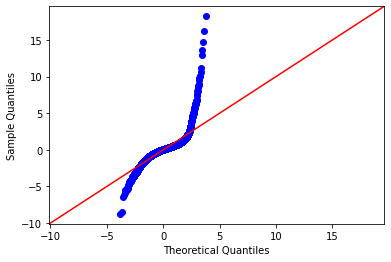

In [350]:
sm.graphics.qqplot(resids, stats.norm, line='45', fit=True);

In [351]:
create_vif_dct(X_train_scaled)

{'const': 273.3193734764532,
 'bedrooms': 8.447409888203818,
 'bathrooms': 15.90284825576738,
 'sqft_living': 16.506080081238043,
 'sqft_lot': 2.268210929145194,
 'floors': 2.476779628948699,
 'waterfront': 1.2472653294814657,
 'view': 1.4001779470433515,
 'condition': 1.3614459772294658,
 'grade': 3.895945779929304,
 'sqft_above': 15.76398125252129,
 'yr_built': 3.0447337672069503,
 'lat': 64.72830504713296,
 'long': 32.659402000928296,
 'sqft_living15': 3.3640747318462902,
 'sqft_lot15': 2.356767583839578,
 'month_sold': 1.013353065751807,
 'renovated': 1.1431891284989697,
 'bath_per_bed': 10.487601437224242,
 'price_per_sqft': 3.5595380387054774,
 'zipcode_98002': 1.5812862096344757,
 'zipcode_98003': 1.8194931244271664,
 'zipcode_98004': 7.054128988798131,
 'zipcode_98005': 4.041629429067643,
 'zipcode_98006': 7.835568443497517,
 'zipcode_98007': 3.9390760367649498,
 'zipcode_98008': 6.708681569563762,
 'zipcode_98010': 1.9434010191363027,
 'zipcode_98011': 7.658633271643838,
 'zip

## Conclusion

The most important features in relation to the price of a house in Kings County are square footage, location, and grade of the house

### Recommendations

1. If you are selling your house or increase the value of it, try and increase the square footage of the house (whether it's adding an addition to the property)
2. If you are buying a house, do your research on the area. Houses tend to be higher in price in certain zipcodes and lower in others. There might be certain qualities in neighborhoods that are more appealing to live in than others.
3. If you are selling, improve the quality of your house by investing in upgrades. Grade has proven to be a huge factor correlating with the price

### Future Work

1. Gather data from different school districts in KC to see if there is a relationship with prices of a house and the quality of schools.
2. Get before/after stats on renovated houses to see the frequency houses are being renovated and if it has an affect on prices